
# Project: Investigate a Dataset TMDb-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description

TMDb dataset contains information about thousands of movies collected from the database,
 This data includes user ratings, budget and revenue of the movie

### Question(s) for Analysis
<ol>
<li>Movies which had most and least profit
<li>Movies with largest and lowest budgets
<li>Movies with most and least earned revenu.
<li>Movies with longest and shortest runtime values
<li>Average runtime of all the movies.
<li> Average Budget, Revenue
<li>In which year we had most no.of profitable movies.
</ol>

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import pprint
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and the results of the Questions,
We will be only keeping the relevant and important data so that our calculations would be
easy and understandable

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Reading Data From CSV file
movieData=pd.read_csv('tmdb-movies.csv')

movieData.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Observations
<ol>
<li> there was no unit indicating the currency of budget and revenue (like dollars or euros)
<li> the vote count are not the same or near to each other we can not accept the popularity of the movie based on average votes
</ol>

### Data Cleaning
##### we will remove the following
<ol>
<li> imdb_id, vote_count, keywords,homepage etc.
<li>will remove duplicate rows
<li>deleting movies that doesn't have a record for budget or revenue
<li>change the format of the release date
<li> changing fromate of budget and revenue
<li> replacing 0 runtime with NAN
</ol>

### 1) Removing columns
 we will delete imdb_id, vote_count, keywords,homepage, budget_adj, revenue_adj, vote_count and vote_average.


In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#declaring a list including the deleted items
removed=[ 'id','imdb_id','vote_count', 'keywords','homepage', 'budget_adj', 'revenue_adj', 'vote_count' ,'vote_average','popularity', 'overview']

movieData=movieData.drop(removed,1)
movieData.head()

C:\Users\Omar\AppData\Local\Temp/ipykernel_20620/1307594870.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  movieData=movieData.drop(removed,1)


,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


### 2) Removing Duplicates
let us calculate hpw many entries we have
in the dataset

In [5]:
rows,col = movieData.shape
print("we have " ,rows-1, "entries and ",col," columns")

we have  10865 entries and  11  columns


Now removing Duplicate rows

In [6]:
movieData.drop_duplicates(keep='first',inplace=True)
rows,col = movieData.shape
print("we have now have " ,rows-1, "entries and ",col," columns")

we have now have  10864 entries and  11  columns


So we had a duplicate row

### 3) deleting movies that doesn't have a record for budget or revenue
we will look for Movies that don't have an entry for the budget and revenue and delete them
as they will cause problems in our calculations

In [7]:
check=['budget','revenue']
movieData[check]=movieData[check].replace(0,np.NAN)

movieData.dropna(subset=check,inplace=True)


rows,col = movieData.shape
print("we have now have " ,rows-1, "entries and ",col," columns")

we have now have  3853 entries and  11  columns


## 4) changing the format of the release date

In [8]:
movieData.release_date=pd.to_datetime(movieData['release_date'])

movieData.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


## 5) Changing format of budget and revenue

In [9]:
movieData.dtypes

budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

In [10]:
change=['budget','revenue']
movieData[change]=movieData[change].applymap(np.int64)
movieData.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

## 6) changing 0 runtime with NAN

In [11]:
movieData['runtime']=movieData['runtime'].replace(0,np.NAN)

<a id='eda'></a>
## Exploratory Data Analysis
### 1) Calculating the Profit of each movie

In [21]:
movieData.insert(2,'profit',movieData['revenue']-movieData['budget'])
movieData.head()

,budget,revenue,profit,Profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,1363528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,228436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000,295238201,185238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000,2068178225,1868178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000,1506249360,1316249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


### Research Question 1) Movies which had most and least profit

In [26]:
import pprint
def maxmin(col):
    high = movieData[col].idxmax()
    HDetails=pd.DataFrame(movieData.loc[high])
    low = movieData[col].idxmin()
    LDetails=pd.DataFrame(movieData.loc[low])

    result=pd.concat([HDetails,LDetails],axis=1)
    return result

maxmin('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
Profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


Column with id 1386 shows the highest earned profit which is 2544505847 .

MeanWhile, the column with id 2244 shows the lowest earned profit which is -413912431

### Research Question 2) Movies with largest and lowest budgets


In [27]:
maxmin('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit,-413912431,99
Profit,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


Column with id 2244 shows the largest budget which is 425000000 dollar.

MeanWhile, the column with id 2618 shows the smallest budget which is 1 dollar

### Research Question 3) Movies with most and least earned revenu.

In [28]:
maxmin('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit,2544505847,-5999998
Profit,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


Column with id 1386 shows the largest revenue earned which is 2781505847 dollar.

MeanWhile, the column with id 5067 shows the smallest revenue earned which is 2 dollar

### Research Question 4) Movies with longest and shortest runtime values

In [30]:
maxmin('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
Profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


Column with id 2107 shows the longest runtime Which is 338 minutes.

MeanWhile, the column with id 5162 shows the shortest runtime Which is 15 minutes

### Research Question 5) Average runtime of the Movies

In [35]:
def Avg(col):
    return movieData[col].mean()
Avg('runtime')

109.22029060716139

Then the average runtime is 109.2 minutes

### visualizing the Average runtime

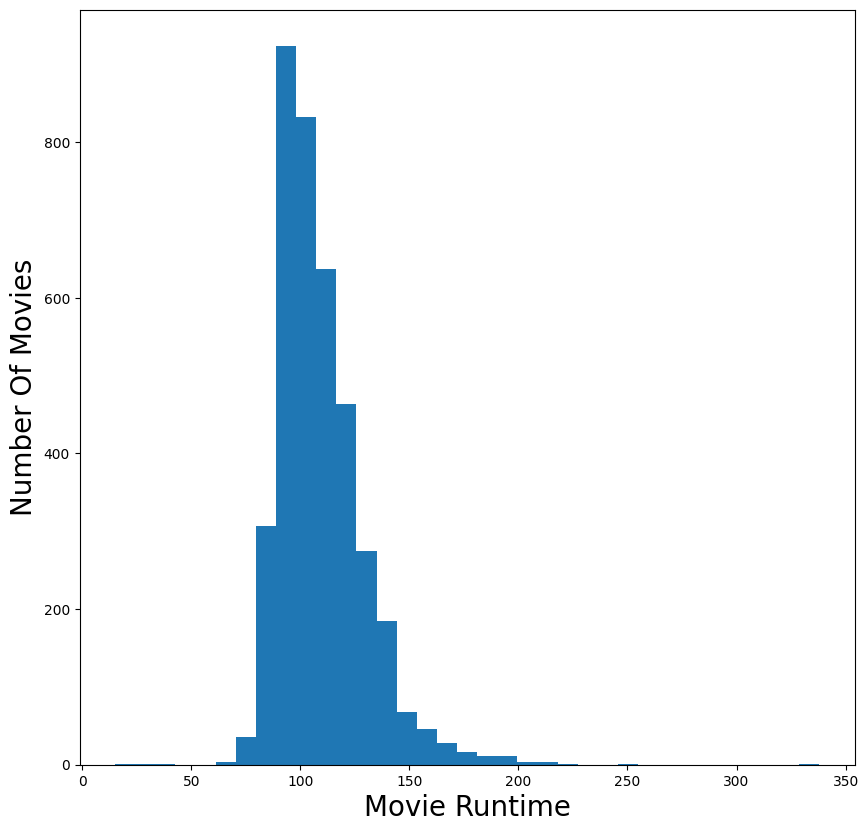

In [34]:
plt.figure(figsize=(10,10),dpi=100)
plt.xlabel("Movie Runtime",fontsize=20)
plt.ylabel("Number Of Movies",fontsize=20)
plt.hist(movieData['runtime'],rwidth=1.0,bins=35)
plt.show()

The Graph shows us that the Distribution is Right Skewed, most of the movies' runtimes are between
85 yo 125 minutes

### Research Question 6) Average Budget, Revenue

In [38]:
print("Average Budget is ", Avg('budget'))
print("Average Revenue is ", Avg('revenue'))

Average Budget is  37203696.954852104
Average Revenue is  107686616.09807992


### Research Question 7) In which year we had most no.of profitable movies.

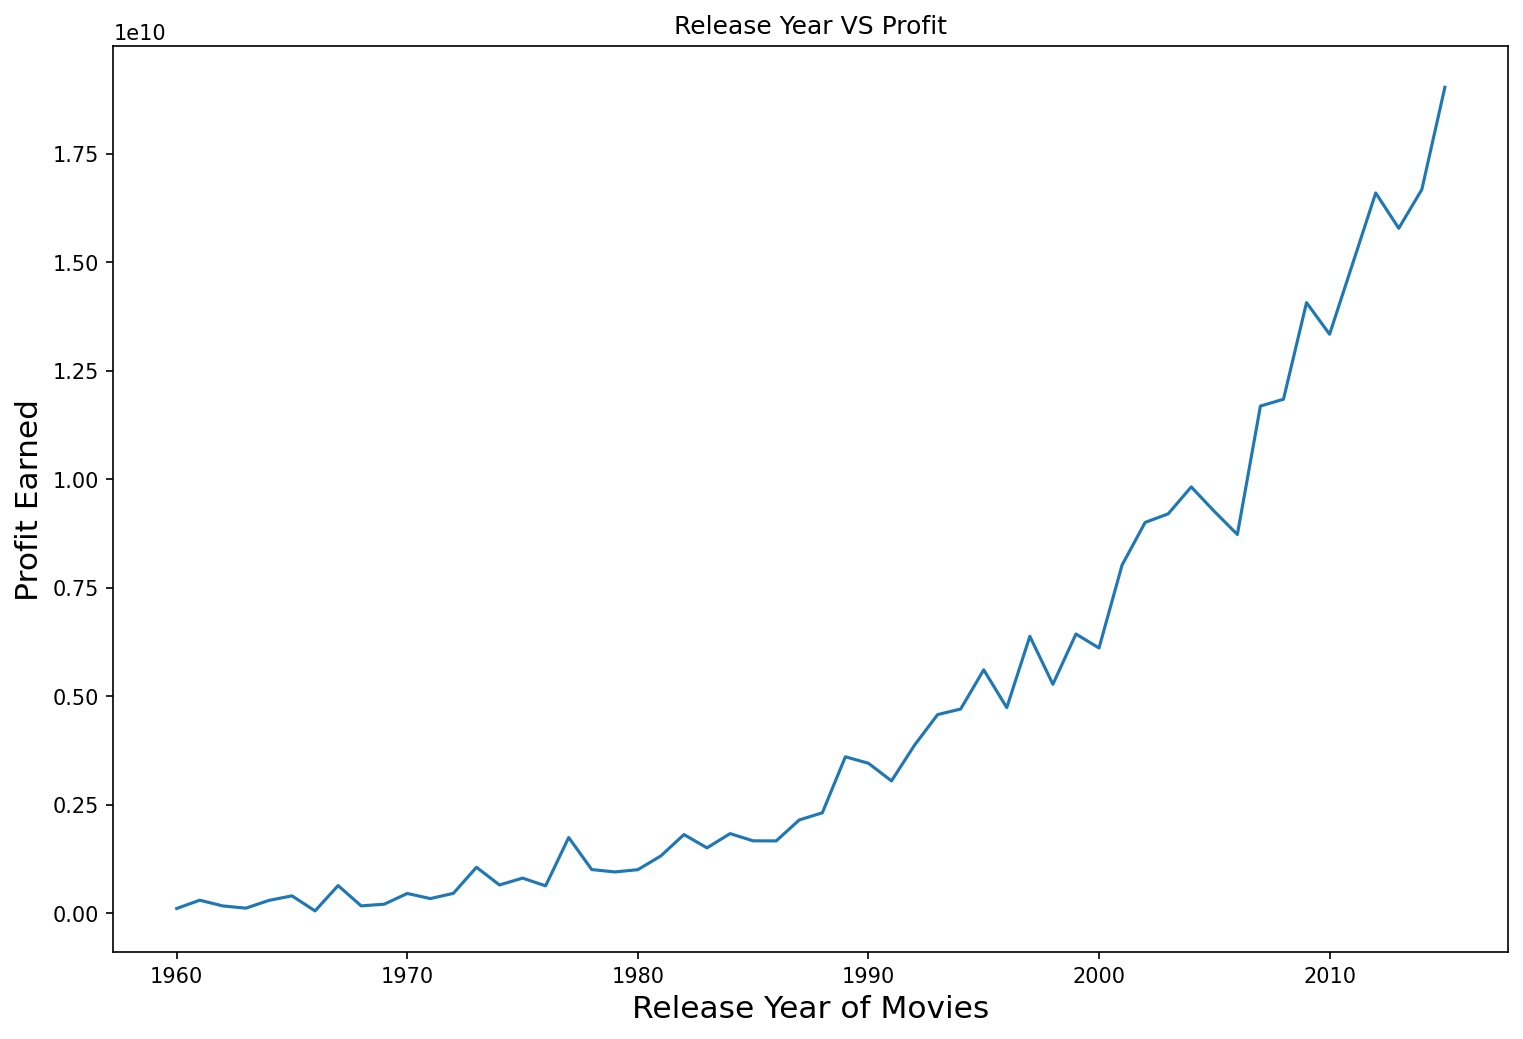

In [48]:
years=movieData.groupby('release_year')['profit'].sum()

plt.figure(figsize=(12,8),dpi=150)

plt.xlabel("Release Year of Movies",fontsize=15)
plt.ylabel("Profit Earned",fontsize=15)
plt.title("Release Year VS Profit")

plt.plot(years)
plt.show()

In [51]:
print ("Most Profitable year is",years.idxmax())

Most Profitable year is 2015


<a id='conclusions'></a>
## Conclusions
We came out with a lot of data from this Dataset
like
<ol>
<li> As we progress through the years movies become more profitable
<li> Average runtime of the movies is nearly 110 minutes
<li> The Higher your budget The more relevant that you'll get more profit

</ol>



### Limitations
The Analysis was done with a fairly big dataset with a lot of variation
in the budget and revenue so the Calculations are not guaranteed to be error free
